In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [3]:
# Read the CSV file
csv_file = 'Data.csv'
df = pd.read_csv(csv_file)

# Determine the split point (e.g., using 80% of the data for training)
split_point = int(len(df) * 0.8)

# Split the data into training and testing sets
train_df = df.iloc[:split_point]
test_df = df.iloc[split_point:]

train_df['Date'] = pd.to_datetime(train_df['Date'], format='%d-%m-%Y')
test_df['Date'] = pd.to_datetime(test_df['Date'], format='%d-%m-%Y')

C:\Users\0703L\AppData\Local\Temp\ipykernel_8028\1175201353.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['Date'] = pd.to_datetime(train_df['Date'], format='%d-%m-%Y')
C:\Users\0703L\AppData\Local\Temp\ipykernel_8028\1175201353.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['Date'] = pd.to_datetime(test_df['Date'], format='%d-%m-%Y')


In [6]:
print("\nTesting data:")
test_df.tail()


Testing data:


,Date,Day,Movement0D,Movement1D,Movement1W,Movement1M,Movement3M,Movement6M,Movement9M,Movement12M,...,Copper9M,Copper12M,sgdusdDate,sgdusd1W,sgdusd1M,sgdusd3M,sgdusd6M,sgdusd9M,sgdusd12M,Sentiment
1893,2023-04-17,Monday,1,0,1,1,1,1,1,0,...,3.3030,4.6660,0.750897,0.752899,0.743450,0.751806,0.695841,0.718711,0.732547,-0.27
1894,2023-04-18,Tuesday,0,0,1,1,1,1,1,0,...,3.3270,4.7070,0.749642,0.751546,0.740187,0.756161,0.695130,0.717885,0.733106,-0.27
1895,2023-04-19,Wednesday,1,1,1,1,1,1,1,0,...,3.3240,4.7170,0.750683,0.750694,0.742959,0.757581,0.697005,0.719735,0.734613,-0.22
1896,2023-04-20,Thursday,1,0,0,1,1,1,1,0,...,3.3215,4.7500,0.749170,0.750554,0.746035,0.757633,0.698792,0.719942,0.736372,-0.22
1897,2023-04-21,Friday,1,0,0,1,1,1,1,0,...,3.4000,4.7975,0.750920,0.753364,0.747831,0.757507,0.701562,0.721485,0.734646,-0.21


In [5]:
print("\nTraining data:")
train_df.head()


Training data:


,Date,Day,Movement0D,Movement1D,Movement1W,Movement1M,Movement3M,Movement6M,Movement9M,Movement12M,...,Copper9M,Copper12M,sgdusdDate,sgdusd1W,sgdusd1M,sgdusd3M,sgdusd6M,sgdusd9M,sgdusd12M,Sentiment
0,2015-09-17,Thursday,0,1,0,0,0,0,0,0,...,2.9205,3.1495,0.715984,0.703789,0.710682,0.748279,0.720160,0.760237,0.793449,0.02
1,2015-09-18,Friday,1,1,0,1,0,0,0,0,...,2.8860,3.1270,0.716409,0.707849,0.712220,0.749400,0.725858,0.757903,0.788190,0.01
2,2015-09-21,Monday,1,0,1,1,0,0,0,0,...,2.8950,3.0880,0.714122,0.708286,0.713613,0.749288,0.721334,0.754620,0.788892,0.04
3,2015-09-22,Tuesday,0,0,0,0,0,0,0,0,...,2.8760,3.0590,0.709703,0.711648,0.712733,0.748649,0.725779,0.756086,0.789883,0.04
4,2015-09-23,Wednesday,1,1,1,1,0,0,0,0,...,2.8555,3.0565,0.705442,0.713012,0.707094,0.745946,0.731106,0.755629,0.787966,0.02


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1518 entries, 0 to 1517
Data columns (total 89 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               1518 non-null   datetime64[ns]
 1   Day                1518 non-null   object        
 2   Movement0D         1518 non-null   int64         
 3   Movement1D         1518 non-null   int64         
 4   Movement1W         1518 non-null   int64         
 5   Movement1M         1518 non-null   int64         
 6   Movement3M         1518 non-null   int64         
 7   Movement6M         1518 non-null   int64         
 8   Movement9M         1518 non-null   int64         
 9   Movement12M        1518 non-null   int64         
 10  BitcoinDate        1518 non-null   float64       
 11  Bitcoin1D          1518 non-null   float64       
 12  Bitcoin1W          1518 non-null   float64       
 13  Bitcoin1M          1518 non-null   float64       
 14  Bitcoin3

# Random Walk

In [8]:
def plot_entire_series(x, y, **kwargs):
    
    plt.figure(figsize=(16, 4))
    plt.plot(x, y, linewidth=2, color='black')
    
    for key, value in kwargs.items():
        plt.plot(x, value, linewidth=2, color=key)
        
    plt.xlabel('Date', fontsize=16)
    plt.ylabel('Bitcoin_Price_Close', fontsize=16)
    plt.show()
    
    return None

In [9]:
train_rw = train_df.copy()

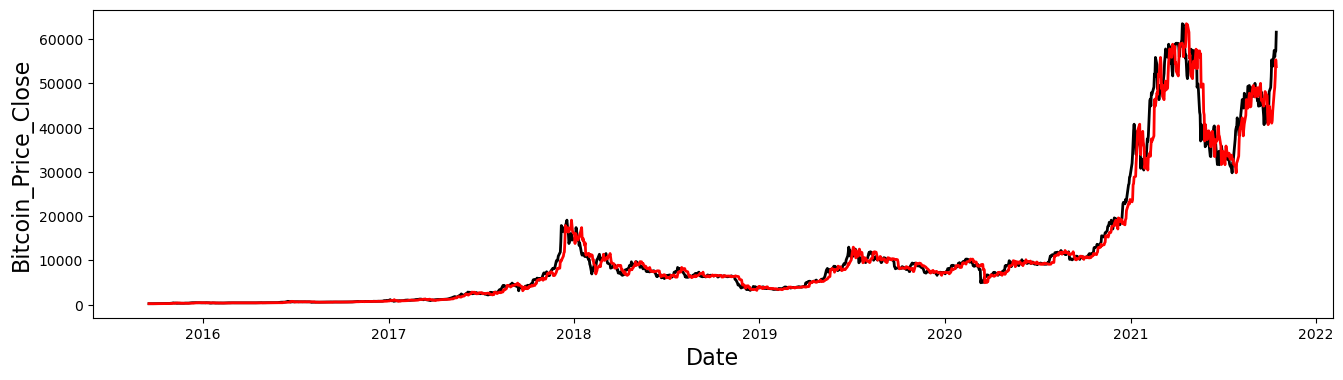

In [10]:
x = train_rw['Date'].to_numpy()
y = train_rw['BitcoinCloseDate'].to_numpy()
y_pred = train_rw['BitcoinClose1W'].to_numpy()

plot_entire_series(x, y, red=y_pred)

In [11]:
def plot_last_fifty(x, y, **kwargs):
    
    plt.figure(figsize=(16, 4))
    plt.scatter(x[-50:], y[-50:], linewidth=3, color='black')
    plt.plot(x[-50:], y[-50:], linewidth=3, color='black')
    
    for key, value in kwargs.items():
        plt.plot(x[-50:], value[-50:], linewidth=3, color=key)
        
    plt.xlabel('Date', fontsize=16)
    plt.ylabel('Bitcoin_Price_Close', fontsize=16)
    plt.show()
    
    return None

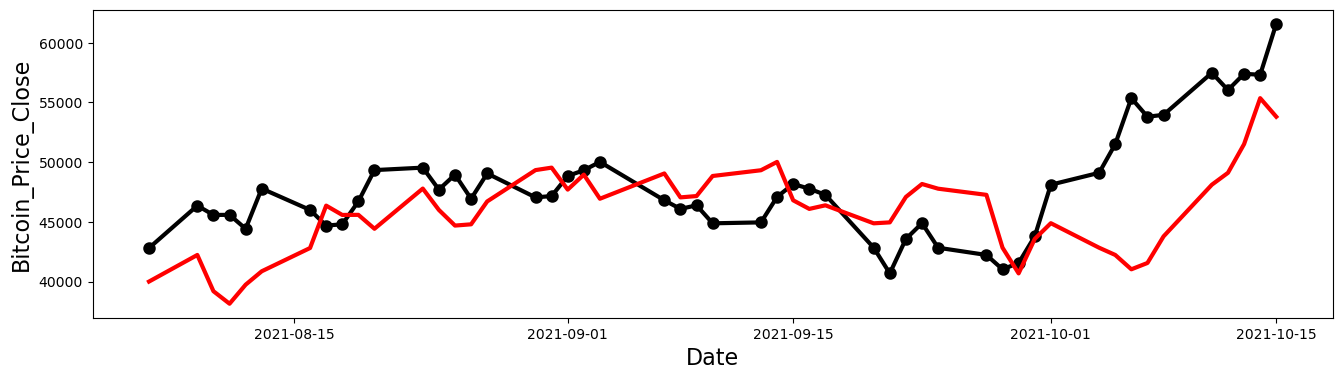

In [12]:
plot_last_fifty(x, y, red=y_pred)

In [14]:
print((abs(train_rw['BitcoinCloseDate'] - train_rw['BitcoinClose1W']) >= 1000).value_counts())

False    1125
True      393
dtype: int64


In [15]:
from sklearn.metrics import r2_score

# Here we slice the series using [1:] in order to discard the first entry which corresponds to a NaN.
print('Training R2:', round(r2_score(train_rw['BitcoinCloseDate'][1:], train_rw['BitcoinClose1W'][1:]), 5))

Training R2: 0.97482


# Auto-Regressive Models

In [16]:
train_ar = train_rw.copy()

ar1 = smf.ols(formula='BitcoinCloseDate ~ BitcoinClose1W', data=train_ar).fit()
print(ar1.summary())

                            OLS Regression Results                            
Dep. Variable:       BitcoinCloseDate   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                 5.942e+04
Date:                Sun, 23 Apr 2023   Prob (F-statistic):               0.00
Time:                        22:30:33   Log-Likelihood:                -13884.
No. Observations:                1518   AIC:                         2.777e+04
Df Residuals:                    1516   BIC:                         2.778e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        146.1032     73.354      1.

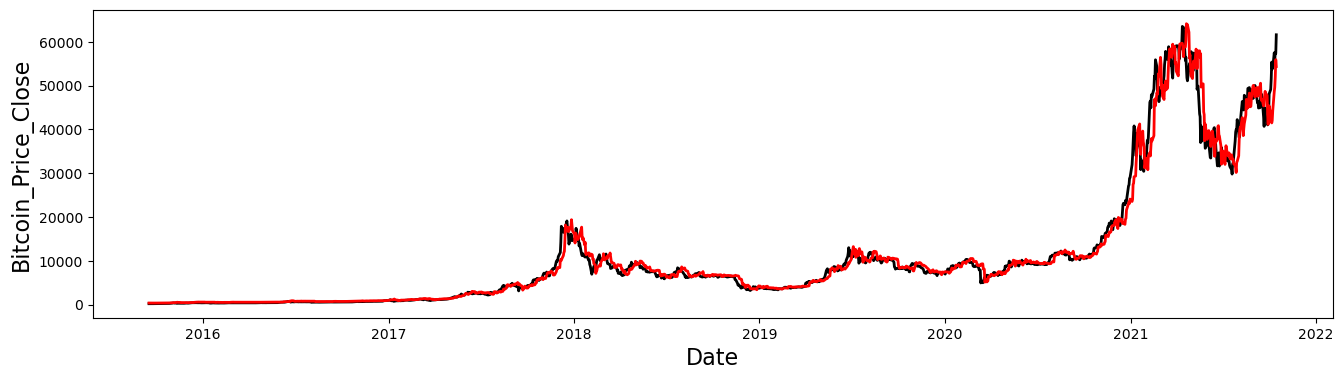

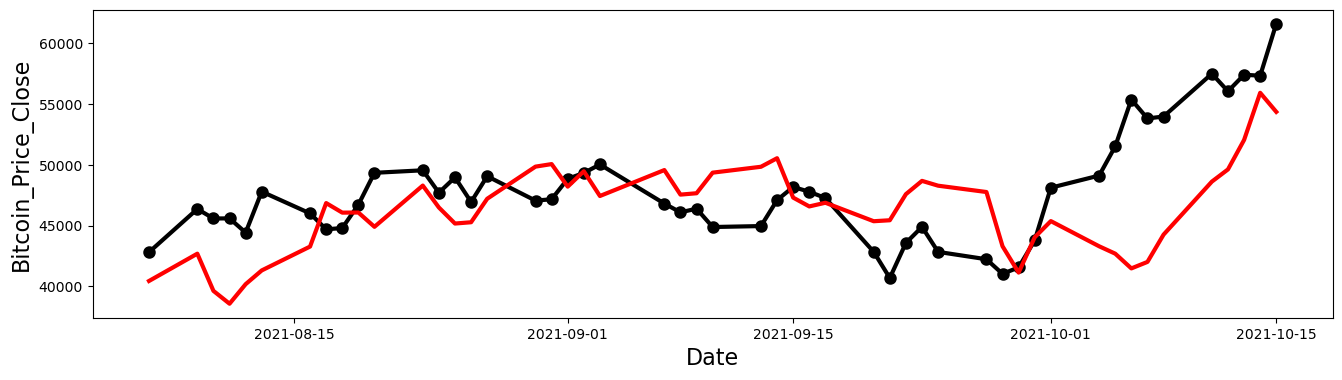

In [17]:
x = train_ar['Date'].to_numpy()
y = train_ar['BitcoinCloseDate'].to_numpy()
y_pred = ar1.predict(train_ar).to_numpy()

plot_entire_series(x, y, red=y_pred)
plot_last_fifty(x, y, red=y_pred)

In [18]:
print((abs(train_ar['BitcoinCloseDate'] - ar1.predict(train_ar)) >= 1000).value_counts())

False    1108
True      410
dtype: int64


In [33]:
def get_significant_formula(model):
    # Get the p-values from the model summary
    p_values = model.summary2().tables[1]['P>|t|']

    # Filter the variables with p-value less than 0.05
    significant_vars = p_values[p_values < 0.05].index.tolist()

    # Remove the intercept from the list of significant variables
    if 'Intercept' in significant_vars:
        significant_vars.remove('Intercept')

    # Generate the formula
    formula = 'BitcoinCloseDate ~ ' + ' + '.join(significant_vars)
    
    return formula

In [34]:
get_significant_formula(ar1)

'BitcoinCloseDate ~ BitcoinClose1W'

In [35]:
ar2 = smf.ols(formula='BitcoinCloseDate ~ BitcoinClose1W + BitcoinClose1M', data=train_ar).fit()
print(ar2.summary())

                            OLS Regression Results                            
Dep. Variable:       BitcoinCloseDate   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                 2.971e+04
Date:                Sun, 23 Apr 2023   Prob (F-statistic):               0.00
Time:                        22:47:00   Log-Likelihood:                -13883.
No. Observations:                1518   AIC:                         2.777e+04
Df Residuals:                    1515   BIC:                         2.779e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        149.7366     73.433      2.

In [36]:
get_significant_formula(ar2)

'BitcoinCloseDate ~ BitcoinClose1W'

No Improvement seen and not significant, keep AR1

# Seasonality

In [24]:
train_ar['Year'] = train_ar['Date'].dt.year
train_ar['Month'] = train_ar['Date'].dt.month_name()
train_ar.head()

,Date,Day,Movement0D,Movement1D,Movement1W,Movement1M,Movement3M,Movement6M,Movement9M,Movement12M,...,sgdusdDate,sgdusd1W,sgdusd1M,sgdusd3M,sgdusd6M,sgdusd9M,sgdusd12M,Sentiment,Year,Month
0,2015-09-17,Thursday,0,1,0,0,0,0,0,0,...,0.715984,0.703789,0.710682,0.748279,0.720160,0.760237,0.793449,0.02,2015,September
1,2015-09-18,Friday,1,1,0,1,0,0,0,0,...,0.716409,0.707849,0.712220,0.749400,0.725858,0.757903,0.788190,0.01,2015,September
2,2015-09-21,Monday,1,0,1,1,0,0,0,0,...,0.714122,0.708286,0.713613,0.749288,0.721334,0.754620,0.788892,0.04,2015,September
3,2015-09-22,Tuesday,0,0,0,0,0,0,0,0,...,0.709703,0.711648,0.712733,0.748649,0.725779,0.756086,0.789883,0.04,2015,September
4,2015-09-23,Wednesday,1,1,1,1,0,0,0,0,...,0.705442,0.713012,0.707094,0.745946,0.731106,0.755629,0.787966,0.02,2015,September


In [25]:
month_mapping = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6, 'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}

avg_price_by_year_month = train_ar.groupby(['Year', 'Month']).mean()['BitcoinCloseDate']

avg_price_by_year_month.index = avg_price_by_year_month.index.set_levels(avg_price_by_year_month.index.levels[1].map(month_mapping), level=1)

# Sort by 'Year' and the numerical value of 'Month'
avg_price_by_year_month = avg_price_by_year_month.sort_index()

# Map the month numbers back to their corresponding names
avg_price_by_year_month.index = avg_price_by_year_month.index.set_levels(avg_price_by_year_month.index.levels[1].map({v: k for k, v in month_mapping.items()}), level=1)

avg_price_by_year_month

C:\Users\0703L\AppData\Local\Temp\ipykernel_8028\976386183.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_price_by_year_month = train_ar.groupby(['Year', 'Month']).mean()['BitcoinCloseDate']


Year  Month    
2015  September      233.089333
      October        265.089717
      November       349.766248
      December       421.725047
2016  January        413.068791
                       ...     
2021  June         35960.901811
      July         34368.211497
      August       45388.525569
      September    45292.053945
      October      54702.032316
Name: BitcoinCloseDate, Length: 74, dtype: float64

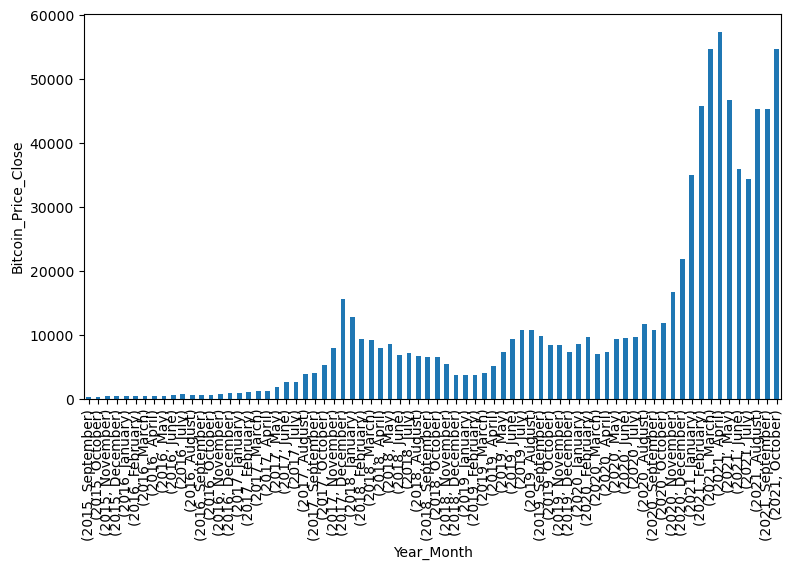

In [26]:
plt.figure(figsize=(9, 5))
avg_price_by_year_month.plot(kind="bar")
plt.ylabel('Bitcoin_Price_Close')
plt.xlabel('Year_Month')
plt.show()

C:\Users\0703L\AppData\Local\Temp\ipykernel_8028\345609829.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_price_by_year = train_ar.groupby('Year', sort=False).mean()['BitcoinCloseDate']


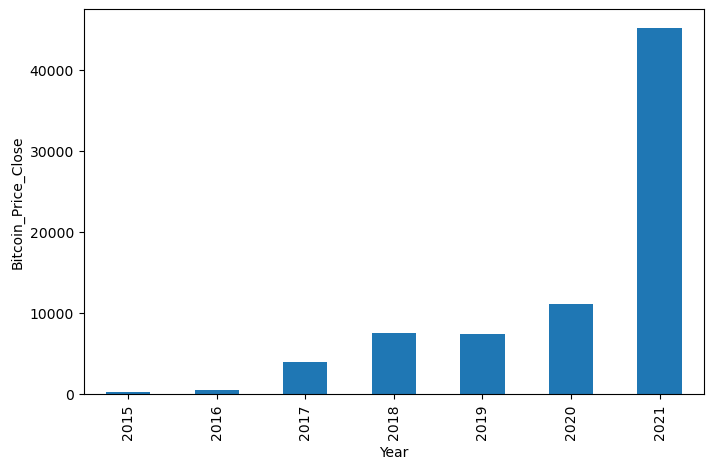

In [28]:
avg_price_by_year = train_ar.groupby('Year', sort=False).mean()['BitcoinCloseDate']

plt.figure(figsize=(8, 5))
avg_price_by_year.plot(kind="bar")
plt.ylabel('Bitcoin_Price_Close')
plt.xlabel('Year')
plt.show()

In [37]:
ar3 = smf.ols(formula='BitcoinCloseDate ~ BitcoinClose1W + Year + Month + Day', data=train_ar).fit()
print(ar3.summary())

                            OLS Regression Results                            
Dep. Variable:       BitcoinCloseDate   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     3651.
Date:                Sun, 23 Apr 2023   Prob (F-statistic):               0.00
Time:                        22:47:07   Log-Likelihood:                -13844.
No. Observations:                1518   AIC:                         2.772e+04
Df Residuals:                    1500   BIC:                         2.782e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -4.261e+05   9.76

In [38]:
get_significant_formula(ar3)

'BitcoinCloseDate ~ Month[T.December] + Month[T.February] + Month[T.May] + Month[T.October] + BitcoinClose1W + Year'

In [39]:
# Create separate variable for Feb, May, Oct, Dec, since they are the months significantly different
# from April (the reference level)
month_names = ['February', 'May', 'October', 'December']

# Loop through the month names and create binary columns for each month
for month in month_names:
    train_ar[f'Month{month}'] = np.where(train_ar['Month'] == month, 1, 0)

In [41]:
ar4 = smf.ols(formula='BitcoinCloseDate ~ MonthDecember + MonthFebruary + MonthMay + MonthOctober + BitcoinClose1W + Year', data=train_ar).fit()
print(ar4.summary())

                            OLS Regression Results                            
Dep. Variable:       BitcoinCloseDate   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                 1.033e+04
Date:                Sun, 23 Apr 2023   Prob (F-statistic):               0.00
Time:                        22:47:24   Log-Likelihood:                -13850.
No. Observations:                1518   AIC:                         2.771e+04
Df Residuals:                    1511   BIC:                         2.775e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -4.236e+05   9.66e+04     -4.

In [42]:
get_significant_formula(ar4)

'BitcoinCloseDate ~ MonthDecember + MonthFebruary + MonthMay + MonthOctober + BitcoinClose1W + Year'

In [43]:
train_ar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1518 entries, 0 to 1517
Data columns (total 95 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               1518 non-null   datetime64[ns]
 1   Day                1518 non-null   object        
 2   Movement0D         1518 non-null   int64         
 3   Movement1D         1518 non-null   int64         
 4   Movement1W         1518 non-null   int64         
 5   Movement1M         1518 non-null   int64         
 6   Movement3M         1518 non-null   int64         
 7   Movement6M         1518 non-null   int64         
 8   Movement9M         1518 non-null   int64         
 9   Movement12M        1518 non-null   int64         
 10  BitcoinDate        1518 non-null   float64       
 11  Bitcoin1D          1518 non-null   float64       
 12  Bitcoin1W          1518 non-null   float64       
 13  Bitcoin1M          1518 non-null   float64       
 14  Bitcoin3

In [45]:
# Get the list of all independent variable column names
independent_vars = train_ar.columns.tolist()
independent_vars.remove('BitcoinCloseDate')
independent_vars.remove('Month')
independent_vars.remove('Date')
independent_vars.remove('Day')

# Generate the formula
formula = 'BitcoinCloseDate ~ ' + ' + '.join(independent_vars)

# Fit the OLS model
ar5 = smf.ols(formula=formula, data=train_ar).fit()
print(ar5.summary())

                            OLS Regression Results                            
Dep. Variable:       BitcoinCloseDate   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     6602.
Date:                Sun, 23 Apr 2023   Prob (F-statistic):               0.00
Time:                        22:49:57   Log-Likelihood:                -12107.
No. Observations:                1518   AIC:                         2.440e+04
Df Residuals:                    1427   BIC:                         2.488e+04
Df Model:                          90                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -4.724e+05   2.39e+0

In [46]:
get_significant_formula(ar5)

'BitcoinCloseDate ~ Movement0D + Movement9M + BitcoinDate + Bitcoin1D + Bitcoin1M + Bitcoin3M + Bitcoin9M + BitcoinClose1M + BitcoinClose3M + BitcoinClose6M + BitcoinVolumeDate + BitcoinVolume12M + SPY1M + CLDate + CL1M + CL3M + CL12M + CornDate + Corn1W + Corn1M + Corn6M + Corn9M + Wheat1M + Wheat6M + Wheat9M + Gold1M + Gold3M + Gold6M + Gold9M + Gold12M + CopperDate + Copper9M + sgdusd1M + sgdusd9M + sgdusd12M + Year + MonthMay'

In [47]:
formula = get_significant_formula(ar5)
ar6 = smf.ols(formula=formula, data=train_ar).fit()
print(ar6.summary())

                            OLS Regression Results                            
Dep. Variable:       BitcoinCloseDate   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 1.603e+04
Date:                Sun, 23 Apr 2023   Prob (F-statistic):               0.00
Time:                        22:50:40   Log-Likelihood:                -12158.
No. Observations:                1518   AIC:                         2.439e+04
Df Residuals:                    1481   BIC:                         2.459e+04
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -3.031e+05   9.03e+0

In [48]:
get_significant_formula(ar6)

'BitcoinCloseDate ~ Movement0D + Movement9M + BitcoinDate + Bitcoin1D + Bitcoin1M + Bitcoin3M + Bitcoin9M + BitcoinClose1M + BitcoinClose6M + CL12M + CornDate + Corn1W + Corn1M + Corn6M + Wheat1M + Wheat6M + Wheat9M + Gold1M + Gold6M + Gold9M + Gold12M + CopperDate + Copper9M + sgdusd1M + sgdusd9M + sgdusd12M + Year + MonthMay'

In [49]:
formula = get_significant_formula(ar6)
ar7 = smf.ols(formula=formula, data=train_ar).fit()
print(ar7.summary())

                            OLS Regression Results                            
Dep. Variable:       BitcoinCloseDate   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 2.040e+04
Date:                Sun, 23 Apr 2023   Prob (F-statistic):               0.00
Time:                        22:51:17   Log-Likelihood:                -12169.
No. Observations:                1518   AIC:                         2.440e+04
Df Residuals:                    1489   BIC:                         2.455e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -1.487e+05   6.57e+04     -2.

In [50]:
get_significant_formula(ar7)

'BitcoinCloseDate ~ Movement0D + Movement9M + BitcoinDate + Bitcoin1D + Bitcoin1M + Bitcoin3M + Bitcoin9M + BitcoinClose1M + BitcoinClose6M + CL12M + CornDate + Corn1W + Corn1M + Corn6M + Wheat1M + Wheat6M + Wheat9M + Gold1M + Gold6M + Gold9M + Gold12M + CopperDate + Copper9M + sgdusd1M + sgdusd9M + sgdusd12M + Year + MonthMay'

In [51]:
formula = get_significant_formula(ar7)
ar8 = smf.ols(formula=formula, data=train_ar).fit()
print(ar8.summary())

                            OLS Regression Results                            
Dep. Variable:       BitcoinCloseDate   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 2.040e+04
Date:                Sun, 23 Apr 2023   Prob (F-statistic):               0.00
Time:                        22:53:12   Log-Likelihood:                -12169.
No. Observations:                1518   AIC:                         2.440e+04
Df Residuals:                    1489   BIC:                         2.455e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -1.487e+05   6.57e+04     -2.

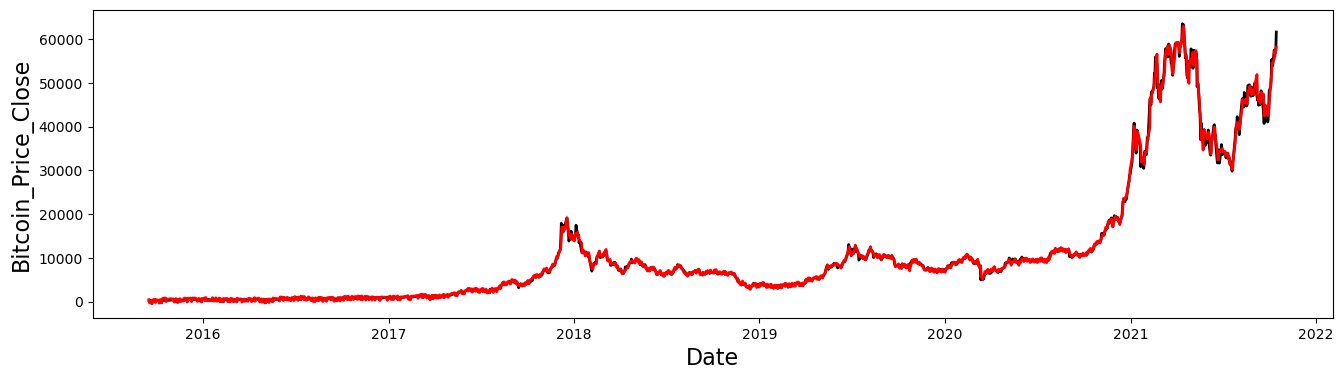

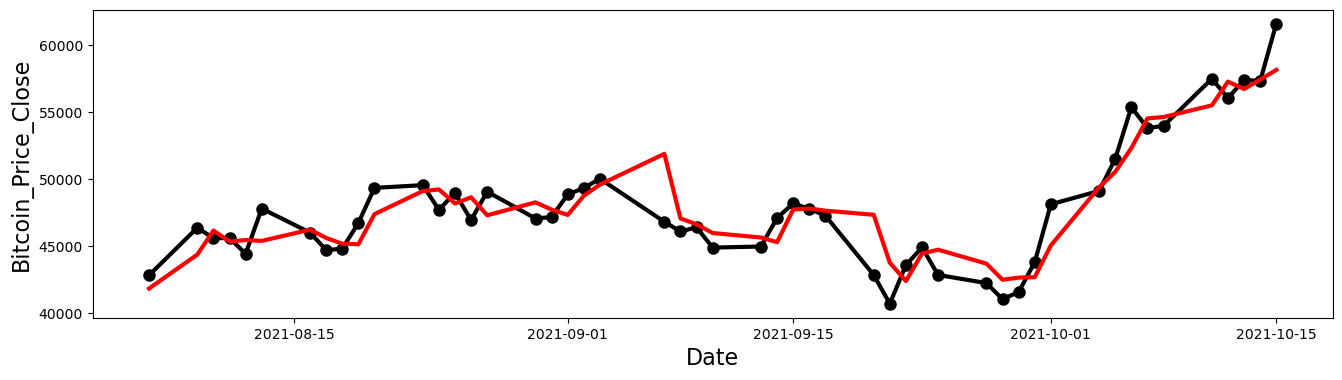

In [52]:
# Use ar8 as the final Auto-regressive model for prediction
y_pred = ar8.predict(train_ar).to_numpy()

plot_entire_series(x, y, red=y_pred)
plot_last_fifty(x, y, red=y_pred)

# Random Forest Models

In [54]:
train_rf = train_ar.drop(['Date', 'MonthFebruary', 'MonthMay', 'MonthOctober', 'MonthDecember'], axis=1).copy()
train_rf.head()

,Day,Movement0D,Movement1D,Movement1W,Movement1M,Movement3M,Movement6M,Movement9M,Movement12M,BitcoinDate,...,sgdusdDate,sgdusd1W,sgdusd1M,sgdusd3M,sgdusd6M,sgdusd9M,sgdusd12M,Sentiment,Year,Month
0,Thursday,0,1,0,0,0,0,0,0,229.076004,...,0.715984,0.703789,0.710682,0.748279,0.720160,0.760237,0.793449,0.02,2015,September
1,Friday,1,1,0,1,0,0,0,0,233.520996,...,0.716409,0.707849,0.712220,0.749400,0.725858,0.757903,0.788190,0.01,2015,September
2,Monday,1,0,1,1,0,0,0,0,231.216995,...,0.714122,0.708286,0.713613,0.749288,0.721334,0.754620,0.788892,0.04,2015,September
3,Tuesday,0,0,0,0,0,0,0,0,226.968994,...,0.709703,0.711648,0.712733,0.748649,0.725779,0.756086,0.789883,0.04,2015,September
4,Wednesday,1,1,1,1,0,0,0,0,230.936005,...,0.705442,0.713012,0.707094,0.745946,0.731106,0.755629,0.787966,0.02,2015,September


In [55]:
train_rf = pd.get_dummies(train_rf, dtype=int)
train_rf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1518 entries, 0 to 1517
Columns: 105 entries, Movement0D to Month_September
dtypes: float64(79), int32(17), int64(9)
memory usage: 1.1 MB


In [56]:
from sklearn.ensemble import RandomForestRegressor

# Again we slice [2:] to discard the entries with NaN.
y_train_rf = train_rf['BitcoinCloseDate']
X_train_rf = train_rf.drop(['BitcoinCloseDate'], axis=1)

rf = RandomForestRegressor(max_features=5, min_samples_leaf=5, n_estimators = 500, random_state=88)
rf.fit(X_train_rf, y_train_rf)

RandomForestRegressor(max_features=5, min_samples_leaf=5, n_estimators=500,
                      random_state=88)

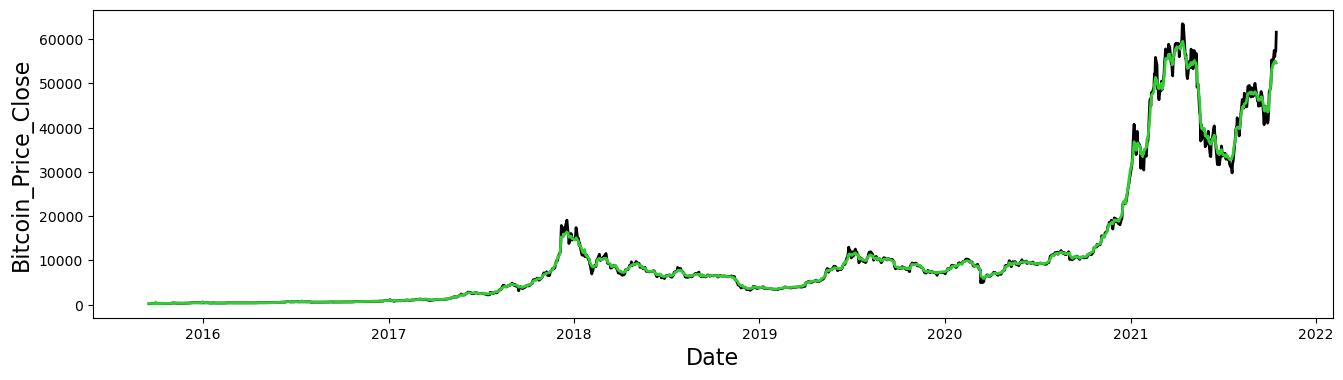

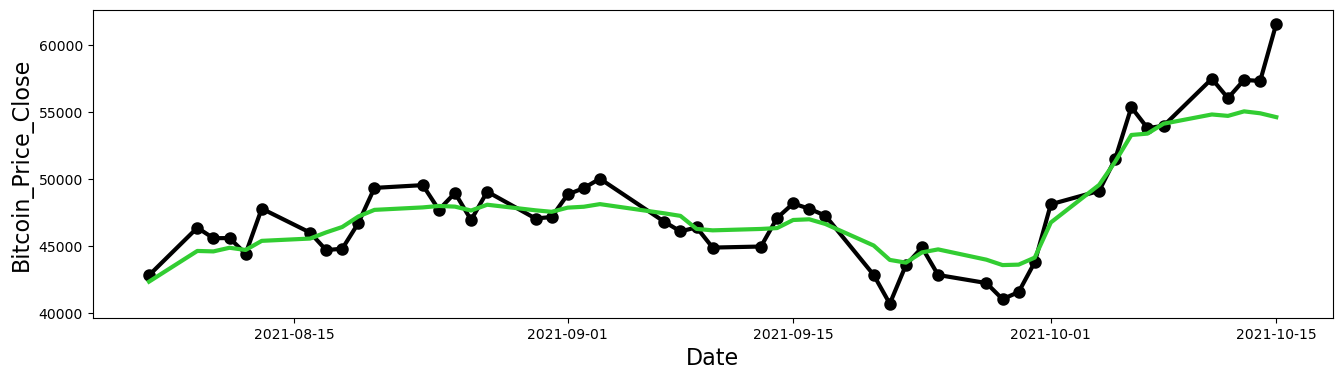

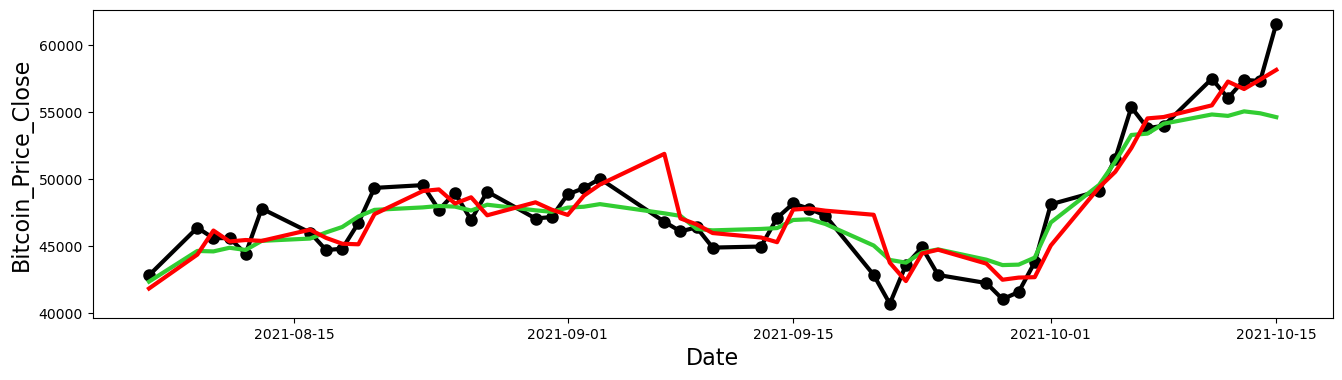

In [57]:
x = train_ar['Date'].to_numpy()
y = y_train_rf.to_numpy()
y_pred_rf = rf.predict(X_train_rf)
y_pred_ar = ar8.predict(train_ar).to_numpy()

plot_entire_series(x, y, limegreen=y_pred_rf)
plot_last_fifty(x, y, limegreen=y_pred_rf)
plot_last_fifty(x, y, limegreen=y_pred_rf, red=y_pred_ar)

In [58]:
def OSR2(model, X_test, y_test, y_train):
    
    y_pred = model.predict(X_test)
    SSE = np.sum((y_test - y_pred)**2)
    SST = np.sum((y_test - np.mean(y_train))**2)
                 
    return (1 - SSE/SST)

In [59]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 1518 to 1897
Data columns (total 89 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               380 non-null    datetime64[ns]
 1   Day                380 non-null    object        
 2   Movement0D         380 non-null    int64         
 3   Movement1D         380 non-null    int64         
 4   Movement1W         380 non-null    int64         
 5   Movement1M         380 non-null    int64         
 6   Movement3M         380 non-null    int64         
 7   Movement6M         380 non-null    int64         
 8   Movement9M         380 non-null    int64         
 9   Movement12M        380 non-null    int64         
 10  BitcoinDate        380 non-null    float64       
 11  Bitcoin1D          380 non-null    float64       
 12  Bitcoin1W          380 non-null    float64       
 13  Bitcoin1M          380 non-null    float64       
 14  Bitcoi

In [60]:
test_rf = test_df.copy()

test_rf['Year'] = test_rf['Date'].dt.year
test_rf['Month'] = test_rf['Date'].dt.month_name()
test_rf = test_rf.drop(['Date'], axis=1)

# Alignment of categorical encoding between train and test sets
test_rf = pd.get_dummies(test_rf, dtype=int)
train_rf, test_rf = train_rf.align(test_rf, join='left', axis=1)
test_rf.fillna(0, inplace=True)

In [61]:
y_test_rf = test_rf['BitcoinCloseDate']
X_test_rf = test_rf.drop(['BitcoinCloseDate'], axis=1)
print('Random Forest Model OSR2:', round(OSR2(rf, X_test_rf, y_test_rf, y_train_rf), 5))

Random Forest Model OSR2: 0.70356


In [63]:
test_ar = test_df.copy()

test_ar['Year'] = test_ar['Date'].dt.year
test_ar['Month'] = test_ar['Date'].dt.month_name()
test_ar['MonthMay'] = np.where(test_ar['Month'] == 'May', 1, 0)

test_ar = test_ar[["BitcoinCloseDate","Movement0D","Movement9M","BitcoinDate","Bitcoin1D","Bitcoin1M","Bitcoin3M","Bitcoin9M","BitcoinClose1M","BitcoinClose6M","CL12M","CornDate","Corn1W","Corn1M","Corn6M","Wheat1M","Wheat6M","Wheat9M","Gold1M","Gold6M","Gold9M","Gold12M","CopperDate","Copper9M","sgdusd1M","sgdusd9M","sgdusd12M","Year","MonthMay"]]

In [64]:
test_ar

,BitcoinCloseDate,Movement0D,Movement9M,BitcoinDate,Bitcoin1D,Bitcoin1M,Bitcoin3M,Bitcoin9M,BitcoinClose1M,BitcoinClose6M,...,Gold6M,Gold9M,Gold12M,CopperDate,Copper9M,sgdusd1M,sgdusd9M,sgdusd12M,Year,MonthMay
1518,62026.07813,0,1,61548.80469,57345.90234,48158.90625,31800.01172,30817.62500,47783.35938,61572.78906,...,1770.400024,1854.900024,1897.300049,4.7895,3.5750,0.745951,0.756315,0.736757,2021,0
1519,64261.99219,0,1,62043.16406,61548.80469,47771.00391,30838.28516,32285.79883,47267.51953,55724.26563,...,1782.099976,1864.699951,1898.500000,4.7500,3.6330,0.743373,0.752944,0.735159,2021,0
1520,65992.83594,0,1,64284.58594,62043.16406,47261.40625,29796.28516,32358.61328,42843.80078,56473.03125,...,1769.300049,1855.800049,1907.300049,4.6500,3.6290,0.741345,0.753404,0.736442,2021,0
1521,62210.17188,1,1,66002.23438,64284.58594,43012.23438,32138.87305,32564.02930,40693.67578,53906.08984,...,1783.000000,1844.900024,1901.300049,4.5865,3.5715,0.739618,0.754820,0.736090,2021,0
1522,60692.26563,1,1,62237.89063,66002.23438,40677.95313,32305.95898,30441.04102,43574.50781,51762.27344,...,1794.199951,1843.400024,1913.599976,4.5500,3.5510,0.739251,0.751722,0.737159,2021,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1893,29445.04492,1,1,30317.14648,30409.56250,24770.92578,18117.59375,23393.19141,24375.96094,19051.41797,...,1661.800049,1707.099976,1952.500000,4.1070,3.3030,0.743450,0.718711,0.732547,2023,0
1894,30397.55273,0,1,29449.09180,30317.14648,24373.45703,18868.90625,23233.20117,25052.78906,19157.44531,...,1668.000000,1687.000000,1969.500000,4.0600,3.3270,0.740187,0.717885,0.733106,2023,0
1895,28822.67969,1,1,30394.18750,29449.09180,25055.12305,21175.83398,23163.75195,27423.92969,19382.90430,...,1675.199951,1713.300049,1977.199951,4.0700,3.3240,0.742959,0.719735,0.734613,2023,0
1896,28245.98828,1,1,28823.68359,30394.18750,28041.60156,21161.05078,22607.15625,27767.23633,19185.65625,...,1665.300049,1727.000000,1973.400024,4.0580,3.3215,0.746035,0.719942,0.736372,2023,0


In [66]:
y_test_ar = test_ar['BitcoinCloseDate']
y_train_ar = train_ar['BitcoinCloseDate']
print('Auto-regressive Model OSR2:', round(OSR2(ar8, test_ar, y_test_ar, y_train_ar), 5))

Auto-regressive Model OSR2: 0.987


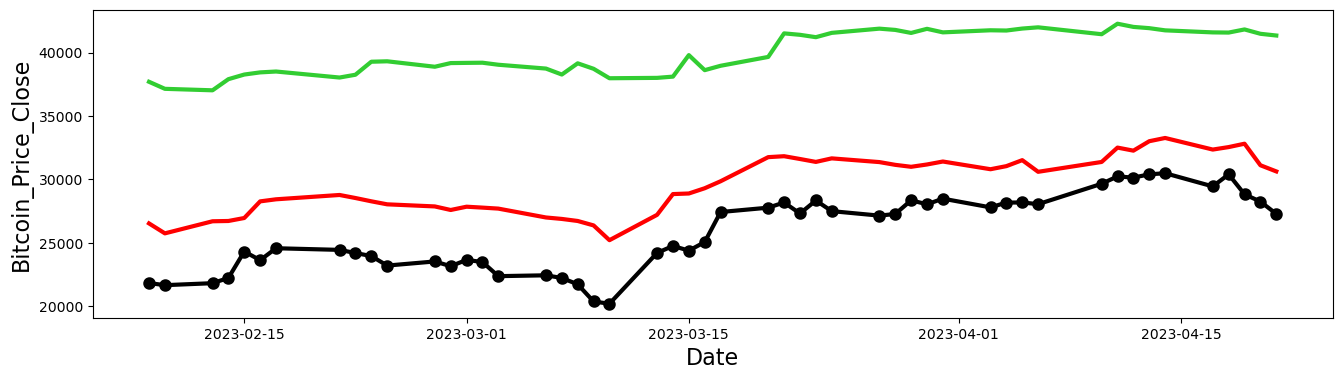

In [67]:
x = test_df['Date'].to_numpy()
y = y_test_rf.to_numpy()

y_pred_rf = rf.predict(X_test_rf)
y_pred_ar = ar8.predict(test_ar)

plot_last_fifty(x, y, limegreen=y_pred_rf, red=y_pred_ar.to_numpy())

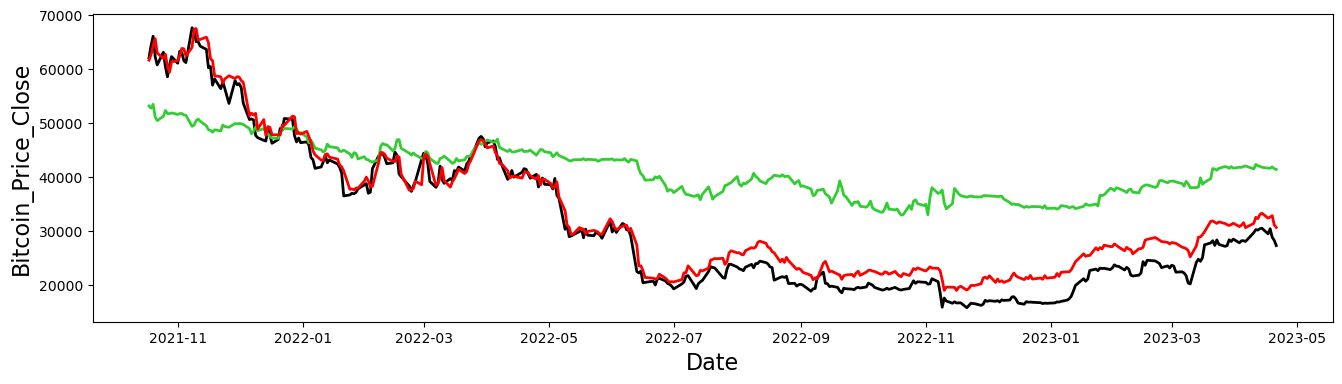

In [68]:
x = test_df['Date'].to_numpy()
y = y_test_rf.to_numpy()

y_pred_rf = rf.predict(X_test_rf)
y_pred_ar = ar8.predict(test_ar)

plot_entire_series(x, y, limegreen=y_pred_rf, red=y_pred_ar.to_numpy())